<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/notebooks/09_iIntroduccion_Keras_en_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo de Tokenización

con keras

In [51]:
import keras
import tensorflow as tf
from nltk.tokenize import word_tokenize


In [52]:
frases = ['Hola mundo', 'Hola a todos', 'Hola a todo el mundo ']


In [53]:
# Genera el diccionario de tokens
tokenizar = tf.keras.preprocessing.text.Tokenizer(num_words=10) # 10 palabras más comunes
tokenizar.fit_on_texts(frases) # Crea el diccionario
word_index = tokenizar.word_index

print('word_index =', word_index)

word_index = {'hola': 1, 'mundo': 2, 'a': 3, 'todos': 4, 'todo': 5, 'el': 6}


In [54]:
#Generación de secuencia tokenizadas

secuencias = tokenizar.texts_to_sequences(frases) # convierte fraces a secuencia de tokens
print('secuencias =', secuencias)

secuencias = [[1, 2], [1, 3, 4], [1, 3, 5, 6, 2]]


In [55]:
# Rellena las secuencias a una longitud uniforme
relleno = tf.keras.preprocessing.sequence.pad_sequences(secuencias) # rellena con 0 hasta alcanzar la sencuia de la longitud mas larga
print('relleno =', relleno)

relleno = [[0 0 0 1 2]
 [0 0 1 3 4]
 [1 3 5 6 2]]


In [56]:
frases = ['Hola mundo', 'Hola a todos', 'Hola a todo el mundo ','Buen día, comó estas hoy?']

In [57]:
# Genera el diccionario de tokens
tokenizar = tf.keras.preprocessing.text.Tokenizer(num_words=10) # 10 palabras más comunes
tokenizar.fit_on_texts(frases) # Crea el diccionario
word_index = tokenizar.word_index

print('word_index =', word_index)

word_index = {'hola': 1, 'mundo': 2, 'a': 3, 'todos': 4, 'todo': 5, 'el': 6, 'buen': 7, 'día': 8, 'comó': 9, 'estas': 10, 'hoy': 11}


In [58]:
#Generación de secuencia tokenizadas

secuencias = tokenizar.texts_to_sequences(frases) # convierte fraces a secuencia de tokens
print('secuencias =', secuencias)

secuencias = [[1, 2], [1, 3, 4], [1, 3, 5, 6, 2], [7, 8, 9]]


In [59]:
# Rellena las secuencias a una longitud uniforme
relleno = tf.keras.preprocessing.sequence.pad_sequences(secuencias) # rellena con 0 hasta alcanzar la sencuia de la longitud mas larga
print('relleno =\n', relleno)

relleno =
 [[0 0 0 1 2]
 [0 0 1 3 4]
 [1 3 5 6 2]
 [0 0 7 8 9]]


Ejemplo de Tokenización

con keras

In [60]:
frases = ['Hola mundo', 'Hola a todos', 'Hola a todo el mundo ','Buen día, comó estas hoy?']

In [61]:
# Genera el diccionario de tokens
tokenizar = tf.keras.preprocessing.text.Tokenizer(num_words=10, oov_token="<OOV>") # 10 palabras más comunes
tokenizar.fit_on_texts(frases) # Crea el diccionario
word_index = tokenizar.word_index

print('word_index =', word_index)

word_index = {'<OOV>': 1, 'hola': 2, 'mundo': 3, 'a': 4, 'todos': 5, 'todo': 6, 'el': 7, 'buen': 8, 'día': 9, 'comó': 10, 'estas': 11, 'hoy': 12}


In [62]:
#Generación de secuencia tokenizadas

secuencias = tokenizar.texts_to_sequences(frases) # convierte fraces a secuencia de tokens
print('secuencias =', secuencias)

secuencias = [[2, 3], [2, 4, 5], [2, 4, 6, 7, 3], [8, 9, 1, 1, 1]]


In [63]:
# Rellena las secuencias a una longitud uniforme
relleno = tf.keras.preprocessing.sequence.pad_sequences(secuencias) # rellena con 0 hasta alcanzar la sencuia de la longitud mas larga
print('relleno =', relleno)

relleno = [[0 0 0 2 3]
 [0 0 2 4 5]
 [2 4 6 7 3]
 [8 9 1 1 1]]


In [64]:
#'pre': Trunca la secuencia desde el principio, es decir, elimina los elementos de la secuencia al principio.
#'post': Trunca la secuencia desde el final, es decir, elimina los elementos de la secuencia al final

# Rellena las secuencias a una longitud uniforme
relleno = tf.keras.preprocessing.sequence.pad_sequences(secuencias,padding = 'post', truncating = 'post') # rellena con 0 hasta alcanzar la sencuia de la longitud mas larga
print('relleno =', relleno)

relleno = [[2 3 0 0 0]
 [2 4 5 0 0]
 [2 4 6 7 3]
 [8 9 1 1 1]]


# **Actividad 2**

In [65]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import matplotlib.pyplot as plt

In [66]:
# Cargar y explorar el conjunto de datos
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())
print(df.describe())
print("Total :\n", df['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000
Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [67]:
# Convertir las reseñas y las etiquetas en listas
sentences = list(df['review'])
labels = df['sentiment']
labels = np.array([1 if label == "positive" else 0 for label in labels])


In [68]:
# Dividir el conjunto de datos en entrenamiento y prueba
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    sentences, labels, test_size=0.2, random_state=42
)


In [69]:

# Definir los parámetros de tokenización y padding
vocab_size = 10000           # Tamaño máximo del vocabulario
oov_tok = "<OOV>"            # Token para palabras fuera del vocabulario
max_length = 100             # Longitud máxima de las secuencias
trunc_type = 'post'          # Truncamiento posterior


In [70]:
# Inicializar y ajustar el tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)


In [71]:
# Convertir las oraciones en secuencias de enteros y aplicar padding
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)


In [72]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)


In [73]:
# Definir la arquitectura del modelo
embedding_dim = 16  # Dimensión del embedding
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [74]:

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [75]:
# Entrenar el modelo
num_epochs = 10   # Ajusta el número de épocas según tu necesidad y recursos

history = model.fit(train_padded, train_labels, epochs=num_epochs,
                    validation_data=(test_padded, test_labels))


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6902 - loss: 0.5436 - val_accuracy: 0.8280 - val_loss: 0.3803
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9041 - loss: 0.2462 - val_accuracy: 0.8171 - val_loss: 0.4207
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9800 - loss: 0.0717 - val_accuracy: 0.8012 - val_loss: 0.6378
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9954 - loss: 0.0178 - val_accuracy: 0.7987 - val_loss: 0.9313
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9987 - loss: 0.0061 - val_accuracy: 0.7982 - val_loss: 1.1779
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9968 - loss: 0.0087 - val_accuracy: 0.7952 - val_loss: 1.3105
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9942 - loss: 0.0160 - val_accuracy: 0.7911 - val_loss: 1.2946
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9975 - loss: 0.

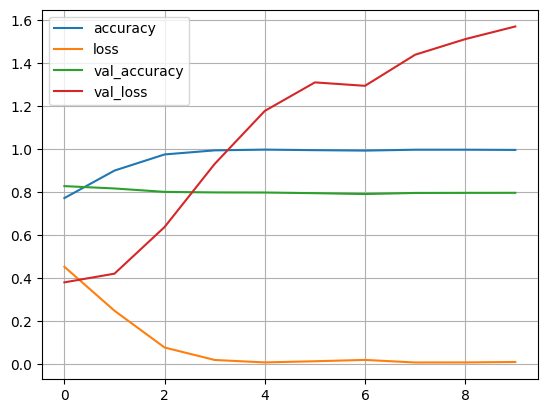

In [76]:

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)
plt.show()

# **¿Qué hace el código en general?**

El código carga y preprocesa un conjunto de datos de reseñas de películas, luego entrena un modelo de red neuronal para clasificar las reseñas como positivas o negativas usando una arquitectura simple. Utiliza técnicas de tokenización e incrustaciones de palabras para transformar el texto en datos numéricos que el modelo puede procesar.

# **Actividad 3**

In [77]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
